# Finding the size of the universe

## Theory

### Friedman Equations

The Friedman equations describe the evolution of the scale factor R (the size of) the universe.

They are,

\begin{equation}
    \frac{\ddot{R}}{R} + \frac{4\pi G}{3} (1 + \epsilon) - \frac{\Lambda}{3} = 0
\end{equation}

and

\begin{equation}
    \Big(\frac{\dot{R}}{R}\Big)^2 - \frac{8\pi G \rho}{3} - \frac{\Lambda}{3} = - \frac{k c ^ 2}{R^2}
\end{equation}

Where $\Lambda$ is the cosmological constant, $\rho$ is the density of the universe (matter and radiation), $k$ is the curvature of the universe {where + is a closed universe, 0 is a flat and infinite universe, and - is an open universe}.

It is useful to cast the second equation using the **conformal time**:

\begin{equation}
   \eta (t_1) = \int^{t_1}_{0} \frac{c}{R(t)} dt
\end{equation}

Which lets us know how far apart objects are before taking into account the scale factor (i.e. mapping to a Minkowski universe).

By the chain rule,

\begin{equation}
    \dot{R} = \frac{c}{R(t)}\frac{dR}{d\eta}
\end{equation}

Before we rewrite the Friedman equations using these building blocks, we need to find an expression for the density $\rho$.

### The continuity equations

We need to find a way to link the density of the universe to the size of the universe. This isn't as straightforward as one may expect. For instance, how dense is a photon gas? How dense is a matter and photon gas? To do so we can approximate by considering the conservation of energy of a sphere undergoing adiabatic expansion,

\begin{equation}
   \rho c^2 V = (\rho + d\rho)c^2(V + dV) + p dV
\end{equation}

We can obtain the result that,

\begin{equation}
    \frac{d\rho}{\rho} = \Big(1 + \frac{p}{\rho c^2}\Big) \frac{dV}{V}
\end{equation}

Which we can rewrite,

\begin{equation}
    \frac{d\rho}{\rho} = \Big(1 + \frac{\epsilon}{3}\Big) \frac{dV}{V}
\end{equation}

In a matter dominated universe $\epsilon$ is approximately zero. In a radiation dominated universe, $\epsilon$ is approximately unity.

Now, we expect that the volume of the universe varies as $V \propto R^3$, using the above equations we can write,

\begin{equation}
    \rho \propto R^{-(3 + \epsilon)}
\end{equation}


### The Master Equations

Using the above, we can rewrite the first order Friedman ODE as,

\begin{equation}
    \Big(\frac{1}{a}\frac{da}{d\eta}\Big)^2 - \frac{8\pi G \rho_0}{3a^{1+\epsilon}}\frac{R^2_0}{c^2} = \Big(\frac{1}{a}\frac{da}{d\eta}\Big)^2 - \frac{a^{1+\epsilon}_m}{a^{1+\epsilon}} =  -k
\end{equation}

Which gives us an expression that we can integrate.

$\rho_0$ and $R_0$ are the density and scale factors as measured today.

## Practice

### Solving the Master Equation

The following imports have been done for you:

In [1]:
#NAME: The Size of the Universe
#DESCRIPTION: Determining and plotting the size of the Universe against time.

import numpy as np
from scipy.integrate import odeint

import matplotlib
from matplotlib import pyplot as plt
%matplotlib notebook

/home/niall/.local/lib/python3.5/site-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


Write a function *cosmo_master_eqn* which returns the value of $\frac{da}{d\eta}$, given a value of a, a linspace t, $am$, $\epsilon$, and $k$ (in that order).

In [7]:
# May be worth setting keyword args
def cosmo_master_eqn(y, eta, am, epsilon, k):
    a = y
    dydt = (a ** (1 - epsilon) * (am) ** (1 + epsilon) - k*a**2) ** 0.5
    return dydt

Now, set the initial values to pass to the integrator. Make the universe {flat|open|closed}.

In [21]:
# Initial conditions
rho_0 = 7.85846e-31
c = 3 * 10 ** 8
G = 6.67 * 10 ** - 11
epsilon = 0
am = 0.04 ** (1/(1+epsilon))
k = -1
y0 = [0]

Create a *linspace* of the conformal time coordinates.

In [22]:
start_eta = 0.0
end_eta = np.pi
steps = 100000
eta = np.linspace(start_eta, end_eta, steps)

Use *odeint* to solve the *cosmo_master_eqn*.

In [23]:
solution = odeint(cosmo_master_eqn, y0, eta, args=(am, epsilon, k))

Plot the solution!

<IPython.core.display.Javascript object>


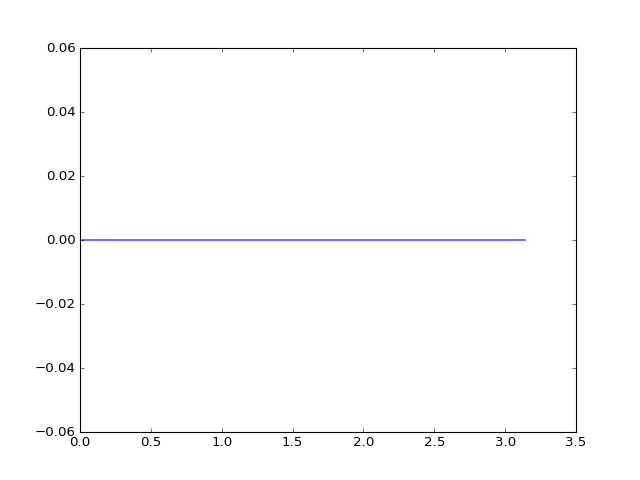

In [24]:
fig = plt.figure()
plt.plot(eta, solution[:,0])

### Finding the Time Solution

The master equation is in terms of the conformal time - using the solution to the master equation found above, integrate using Numpy's *trapz* module to find a value at each time coordinate.

In [19]:
# Technically this finds R_0 * a, the form of the equation is the same.
result = []
deta = eta[1] - eta[0]
for i in range(0, len(solution[:,0])):
    index = i + 1    
    result.append(np.trapz(solution[:index,0], eta[:index], dx=deta))

Plot the result for $t$ against $\eta$ and make a plot of $t$ against $R$.

<IPython.core.display.Javascript object>


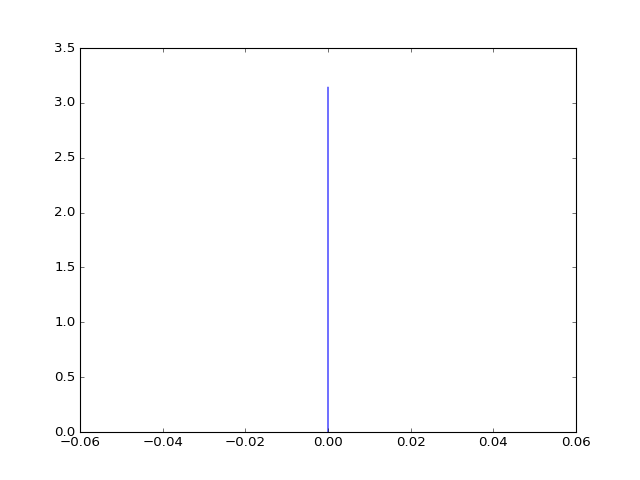

In [20]:
fig1 = plt.figure()
plt.plot(result, eta)

Does your solution make sense? Plot a graph of the log of $t$ against $R$. 
Use *polyfit* to find the form of the equation.

In [14]:
np.polyfit(result, np.log(solution[:,0]), 0)

/home/niall/.local/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


array([ nan])